In [3]:
# Day 1: Very first Petri-net stub
# Only shows S1 → S2 move.

from graphviz import Digraph
import os, platform, subprocess

dot = Digraph("PetriNet_Day1", format="png")
dot.attr(rankdir="LR", labelloc="t", label="Day 1: Initial Petri-net stub")

# Places
dot.node("S1", "S1 Passenger 🚆", shape="circle", style="filled", fillcolor="lightblue")
dot.node("S2", "S2 Passenger 🚆", shape="circle", style="filled", fillcolor="lightblue")

# Transition
dot.node("T_S1_S2", "", shape="rectangle", style="filled", fillcolor="black")

# Edges
dot.edge("S1", "T_S1_S2")
dot.edge("T_S1_S2", "S2")

# Save + open
outfile = dot.render("petri_day1", format="png", cleanup=True)
print(f"✅ Saved: {outfile}")
if platform.system()=="Windows": os.startfile(outfile)
elif platform.system()=="Darwin": subprocess.run(["open", outfile])
else: subprocess.run(["xdg-open", outfile])


✅ Saved: petri_day1.png


In [4]:
# Day 3: Passenger vs Freight with priority at crossing
# Adds S2 (passenger), S3 (freight), shared S4 and inhibitor arc.

from graphviz import Digraph
import os, platform, subprocess

dot = Digraph("PetriNet_Day3", format="png")
dot.attr(rankdir="LR", labelloc="t", label="Day 3: Passenger vs Freight with Priority")

# Places
dot.node("S2", "S2 Passenger 🚆", shape="circle", style="filled", fillcolor="lightblue")
dot.node("S3", "S3 Freight 🚂", shape="circle", style="filled", fillcolor="lightcoral")
dot.node("S4", "S4 Shared", shape="circle", style="filled", fillcolor="lightgray")

# Transitions
dot.node("T_S2_S4", "", shape="rectangle", style="filled", fillcolor="black")
dot.node("T_S3_S4", "", shape="rectangle", style="filled", fillcolor="black")

# Edges
dot.edge("S2", "T_S2_S4"); dot.edge("T_S2_S4", "S4")
dot.edge("S3", "T_S3_S4"); dot.edge("T_S3_S4", "S4")

# Priority (inhibitor arc)
dot.edge("S2", "T_S3_S4", label="Passenger priority", style="dashed", color="red")

# Save + open
outfile = dot.render("petri_day3", format="png", cleanup=True)
print(f"✅ Saved: {outfile}")
if platform.system()=="Windows": os.startfile(outfile)
elif platform.system()=="Darwin": subprocess.run(["open", outfile])
else: subprocess.run(["xdg-open", outfile])


✅ Saved: petri_day3.png


In [5]:
# Day 4: Introduced lock places (CrossingLock + SouthJunctionLock)

from graphviz import Digraph
import os, platform, subprocess

dot = Digraph("PetriNet_Day4", format="png")
dot.attr(rankdir="LR", labelloc="t", label="Day 4: Locks for shared junctions")

# Places
dot.node("S4", "S4 Shared", shape="circle", style="filled", fillcolor="lightgray")
dot.node("S9", "S9 Passenger 🚆", shape="circle", style="filled", fillcolor="lightblue")
dot.node("SouthLock", "South Junction Lock 🔒", shape="circle", style="filled", fillcolor="orange")

# Transition
dot.node("T_S4_S9", "", shape="rectangle", style="filled", fillcolor="black")

# Edges with lock
dot.edge("S4", "SouthLock", label="reserve")
dot.edge("SouthLock", "T_S4_S9", label="grant")
dot.edge("T_S4_S9", "S9")

# Save + open
outfile = dot.render("petri_day4", format="png", cleanup=True)
print(f"✅ Saved: {outfile}")
if platform.system()=="Windows": os.startfile(outfile)
elif platform.system()=="Darwin": subprocess.run(["open", outfile])
else: subprocess.run(["xdg-open", outfile])


✅ Saved: petri_day4.png


In [6]:
# Day 5: Add shared track sections (S5, S6, S10)

from graphviz import Digraph
import os, platform, subprocess

dot = Digraph("PetriNet_Day5", format="png")
dot.attr(rankdir="LR", labelloc="t", label="Day 5: Shared track sections")

# Places
dot.node("S5", "S5 Shared ⚡", shape="circle", style="filled", fillcolor="lightgray")
dot.node("S6", "S6 Shared ⚡", shape="circle", style="filled", fillcolor="lightgray")
dot.node("S10", "S10 Shared ⚡", shape="circle", style="filled", fillcolor="lightgray")

# Transitions
dot.node("T_S5_S6", "", shape="rectangle", style="filled", fillcolor="black")
dot.node("T_S6_S10", "", shape="rectangle", style="filled", fillcolor="black")

# Edges
dot.edge("S5", "T_S5_S6"); dot.edge("T_S5_S6", "S6")
dot.edge("S6", "T_S6_S10"); dot.edge("T_S6_S10", "S10")

# Save + open
outfile = dot.render("petri_day5", format="png", cleanup=True)
print(f"✅ Saved: {outfile}")
if platform.system()=="Windows":
    os.startfile(outfile)
elif platform.system()=="Darwin":  # macOS
    subprocess.run(["open", outfile])
else:  # Linux
    subprocess.run(["xdg-open", outfile])


✅ Saved: petri_day5.png


In [ ]:
from graphviz import Digraph
import os

def build_islington_petri(formal=True, output_name="Islington_PetriNet_Final"):
    dot = Digraph(output_name, format="pdf")
    dot.attr(rankdir="LR", labelloc="t", fontsize="14")

    # Title
    if formal:
        dot.attr(label="Islington Corridor Petri Net (Formal Academic Model)\nPassenger Priority at Crossing + Lock Handling")
    else:
        dot.attr(label="Islington Corridor Petri Net (Symbolic/Explanatory Model with Icons)")

    # ==== Places ====
    places = {
        # Passenger line
        "S1": ("S1" + ("" if formal else " 👤"), "#4F81BD"),
        "S2": ("S2" + ("" if formal else " 👤"), "#4F81BD"),
        "S4": ("S4" + ("" if formal else " 👤"), "#4F81BD"),
        "S8": ("S8" + ("" if formal else " 👤"), "#4F81BD"),
        "S9": ("S9" + ("" if formal else " 👤"), "#4F81BD"),
        "S11":("S11"+ ("" if formal else " 👤"), "#4F81BD"),

        # Freight line
        "S3": ("S3" + ("" if formal else " 🚂"), "#C0504D"),
        "S7": ("S7" + ("" if formal else " 🚂"), "#C0504D"),

        # Shared track
        "S5": ("S5", "#9E9E9E"),
        "S6": ("S6", "#9E9E9E"),
        "S10":("S10","#9E9E9E"),

        # Entries
        "Entry_S1": ("Entry→S1" + ("" if formal else " ⬅️"), "#8064A2"),
        "Entry_S3": ("Entry→S3" + ("" if formal else " ⬅️"), "#8064A2"),
        "Entry_N4": ("Entry→S4" + ("" if formal else " ⬅️"), "#8064A2"),
        "Entry_N9": ("Entry→S9" + ("" if formal else " ⬅️"), "#8064A2"),
        "Entry_N10":("Entry→S10"+ ("" if formal else " ⬅️"), "#8064A2"),
        "Entry_N11":("Entry→S11"+ ("" if formal else " ⬅️"), "#8064A2"),

        # Exits
        "Exit_S4": ("Exit S4" + ("" if formal else " ➡️"), "#9BBB59"),
        "Exit_S8": ("Exit S8" + ("" if formal else " ➡️"), "#9BBB59"),
        "Exit_S9": ("Exit S9" + ("" if formal else " ➡️"), "#9BBB59"),
        "Exit_S11":("Exit S11"+ ("" if formal else " ➡️"), "#9BBB59"),
        "Exit_N2": ("Exit S2" + ("" if formal else " ➡️"), "#9BBB59"),
        "Exit_N3": ("Exit S3" + ("" if formal else " ➡️"), "#9BBB59"),

        # Locks
        "CrossingLock": ("Crossing Lock" + ("" if formal else " 🔒"), "#F79646"),
        "SouthJunctionLock": ("South Junction" + ("" if formal else " 🔒"), "#F79646"),
    }

    # Add nodes
    for nid, (label, color) in places.items():
        dot.node(nid, label, shape="circle", style="filled", fillcolor=color, fontsize="10")

    # ==== Transitions (black rectangles) ====
    transitions = [
        "T_S1_S2", "T_S2_S4", "T_S3_S4",
        "T_S4_S8", "T_S4_S9", "T_S4_S11",
        "T_S5_S6", "T_S6_S10", "T_S6_S8", "T_S6_S9",
        "T_S7_S11", "T_S10_S11",
        "T_Resolve"
    ]
    for tid in transitions:
        dot.node(tid, "", shape="rectangle", width="0.18", height="0.28", style="filled", fillcolor="black")

    # ==== Edges ====
    # Passenger entry/exit
    dot.edge("Entry_S1", "S1"); dot.edge("S1", "T_S1_S2"); dot.edge("T_S1_S2", "S2"); dot.edge("S2", "Exit_N2")
    dot.edge("S2", "T_S2_S4"); dot.edge("T_S2_S4", "S4")

    # Freight entry/exit
    dot.edge("Entry_S3", "S3"); dot.edge("S3", "T_S3_S4"); dot.edge("T_S3_S4", "S4"); dot.edge("S3", "Exit_N3")

    # Other entries/exits
    dot.edge("Entry_N4","S4"); dot.edge("S4","Exit_S4")
    dot.edge("S4","T_S4_S8"); dot.edge("T_S4_S8","S8"); dot.edge("S8","Exit_S8")
    dot.edge("S4","T_S4_S9"); dot.edge("T_S4_S9","S9"); dot.edge("S9","Exit_S9")
    dot.edge("S4","T_S4_S11"); dot.edge("T_S4_S11","S11"); dot.edge("S11","Exit_S11")

    # Shared track
    dot.edge("S4","S5"); dot.edge("S5","T_S5_S6"); dot.edge("T_S5_S6","S6")
    dot.edge("S6","T_S6_S8"); dot.edge("T_S6_S8","S8")
    dot.edge("S6","T_S6_S9"); dot.edge("T_S6_S9","S9")
    dot.edge("S6","T_S6_S10"); dot.edge("T_S6_S10","S10")
    dot.edge("S10","T_S10_S11"); dot.edge("T_S10_S11","S11")

    # Freight branch S7
    dot.edge("S4","S7"); dot.edge("S7","T_S7_S11"); dot.edge("T_S7_S11","S11")

    # Extra entries
    dot.edge("Entry_N9","S9"); dot.edge("Entry_N10","S10"); dot.edge("Entry_N11","S11")

    # Locks + priority arcs
    dot.edge("S2","CrossingLock",label="reserve",fontsize="8")
    dot.edge("CrossingLock","T_S3_S4",label="grant",fontsize="8")
    dot.edge("S4","SouthJunctionLock",label="reserve",fontsize="8")
    dot.edge("SouthJunctionLock","T_S4_S9",label="grant",fontsize="8")

    # Passenger priority inhibitor arc (dashed)
    dot.edge("S2","T_S3_S4",label="Passenger priority",style="dashed",color="red",fontsize="9")

    # Deadlock resolution
    dot.edge("T_Resolve","CrossingLock",style="dotted",label="release",fontsize="8")
    dot.edge("T_Resolve","SouthJunctionLock",style="dotted",label="release",fontsize="8")

    return dot


# === Save both versions to Desktop ===
desktop = os.path.join(os.path.expanduser("~"), "Desktop")

# Formal academic version
formal = build_islington_petri(formal=True, output_name="Islington_PetriNet_Formal")
formal.render(directory=desktop, format="pdf", cleanup=True)
formal.render(directory=desktop, format="png", cleanup=True)

# Symbolic version with icons
symbolic = build_islington_petri(formal=False, output_name="Islington_PetriNet_Symbolic")
symbolic.render(directory=desktop, format="pdf", cleanup=True)
symbolic.render(directory=desktop, format="png", cleanup=True)

print("✅ Final Petri Net diagrams saved on Desktop (PDF + PNG, Formal + Symbolic)")


✅ Generated: Formal + Symbolic diagrams on Desktop (PDF & PNG)


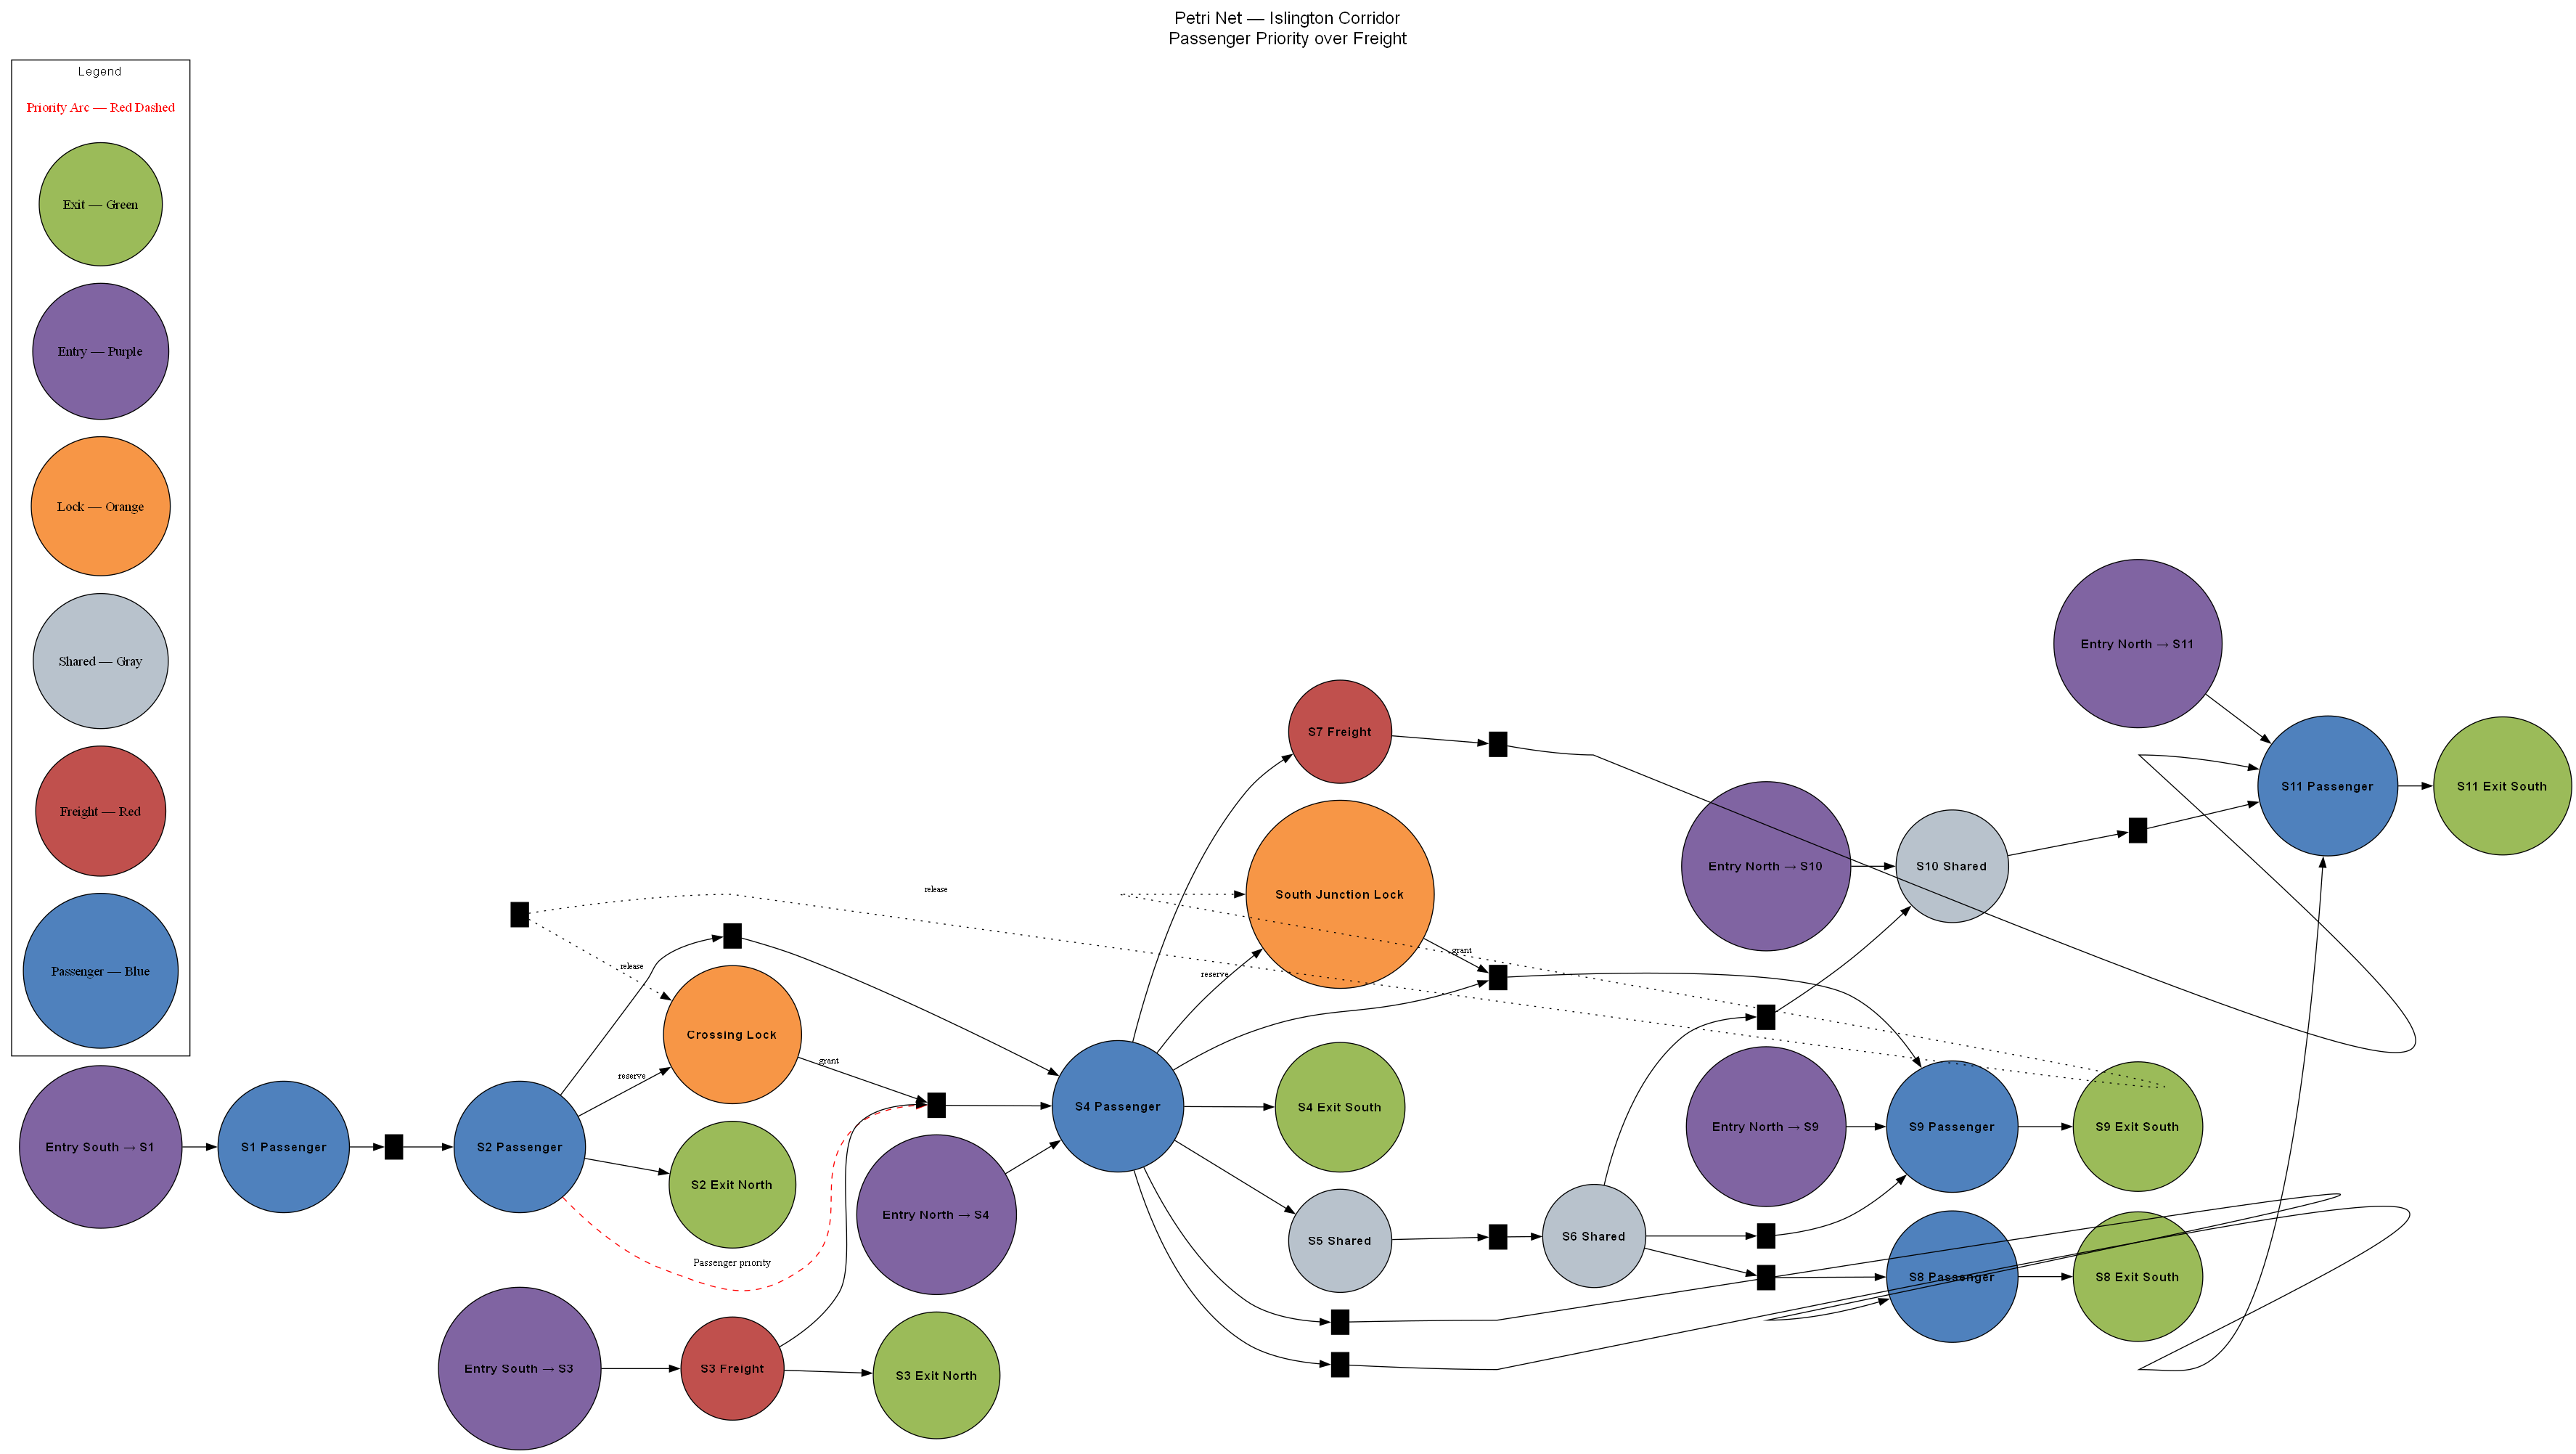

FileNotFoundError: No such file or directory: 'C:\Users\Mahima/Desktop\Islington_PetriNet_Symbolic.png'

FileNotFoundError: No such file or directory: 'C:\Users\Mahima/Desktop\Islington_PetriNet_Symbolic.png'

<IPython.core.display.Image object>

In [ ]:
# Day 9: Final Petri-net diagrams (Formal + Symbolic)...
# Produces two versions:
#  - Formal Academic Model (no emojis)
#  - Symbolic Emoji Model (for presentation)
# Saves PNG + PDF to Desktop AND displays PNG inline in Jupyter.

from graphviz import Digraph
from IPython.display import Image, display
import os

def build_islington_petri(formal=True, output_name="Islington_PetriNet"):
    dot = Digraph(output_name, format="png")
    dot.attr(rankdir="LR", labelloc="t", fontsize="14")

    # Title
    if formal:
        dot.attr(label="Petri Net — Islington Corridor (Formal Academic Model)\nPassenger Priority at Crossing")
    else:
        dot.attr(label="🚦 Petri Net — Islington Corridor\nPassenger 🚆 Priority over Freight 🚂")

    # ==== Places ====
    def p_label(base, emoji):
        return base if formal else f"{base} {emoji}"

    places = {
        # Passenger
        "S1": (p_label("S1 Passenger","🚆"), "#4F81BD"),
        "S2": (p_label("S2 Passenger","🚆"), "#4F81BD"),
        "S4": (p_label("S4 Passenger","🚆"), "#4F81BD"),
        "S8": (p_label("S8 Passenger","🚆"), "#4F81BD"),
        "S9": (p_label("S9 Passenger","🚆"), "#4F81BD"),
        "S11":(p_label("S11 Passenger","🚆"), "#4F81BD"),

        # Freight
        "S3": (p_label("S3 Freight","🚂"), "#C0504D"),
        "S7": (p_label("S7 Freight","🚂"), "#C0504D"),

        # Shared
        "S5": (p_label("S5 Shared","⚡"), "#9E9E9E"),
        "S6": (p_label("S6 Shared","⚡"), "#9E9E9E"),
        "S10":(p_label("S10 Shared","⚡"), "#9E9E9E"),

        # Entries
        "Entry_S1": (p_label("Entry South → S1","⬅️"), "#8064A2"),
        "Entry_S3": (p_label("Entry South → S3","⬅️"), "#8064A2"),
        "Entry_N4": (p_label("Entry North → S4","⬅️"), "#8064A2"),
        "Entry_N9": (p_label("Entry North → S9","⬅️"), "#8064A2"),
        "Entry_N10":(p_label("Entry North → S10","⬅️"), "#8064A2"),
        "Entry_N11":(p_label("Entry North → S11","⬅️"), "#8064A2"),

        # Exits
        "Exit_S4": (p_label("S4 Exit South","➡️"), "#9BBB59"),
        "Exit_S8": (p_label("S8 Exit South","➡️"), "#9BBB59"),
        "Exit_S9": (p_label("S9 Exit South","➡️"), "#9BBB59"),
        "Exit_S11":(p_label("S11 Exit South","➡️"), "#9BBB59"),
        "Exit_N2": (p_label("S2 Exit North","➡️"), "#9BBB59"),
        "Exit_N3": (p_label("S3 Exit North","➡️"), "#9BBB59"),

        # Locks
        "CrossingLock": (p_label("Crossing Lock","🔒"), "#F79646"),
        "SouthJunctionLock": (p_label("South Junction Lock","🔒"), "#F79646"),
    }

    for nid,(label,color) in places.items():
        dot.node(nid,label,shape="circle",style="filled",fillcolor=color,fontsize="10")

    # ==== Transitions ====
    transitions = [
        "T_S1_S2","T_S2_S4","T_S3_S4","T_S4_S8","T_S4_S9","T_S4_S11",
        "T_S5_S6","T_S6_S8","T_S6_S9","T_S6_S10","T_S7_S11","T_S10_S11","T_Resolve"
    ]
    for t in transitions:
        dot.node(t, "" if t!="T_Resolve" else "Resolve", shape="rectangle",
                 style="filled", fillcolor="black" if t!="T_Resolve" else "lightgray",
                 fontsize="8")

    # ==== Edges ====
    dot.edge("Entry_S1","S1"); dot.edge("S1","T_S1_S2"); dot.edge("T_S1_S2","S2")
    dot.edge("S2","T_S2_S4"); dot.edge("T_S2_S4","S4"); dot.edge("S2","Exit_N2")
    dot.edge("Entry_S3","S3"); dot.edge("S3","T_S3_S4"); dot.edge("T_S3_S4","S4"); dot.edge("S3","Exit_N3")

    dot.edge("Entry_N4","S4"); dot.edge("S4","Exit_S4")
    dot.edge("S4","T_S4_S8"); dot.edge("T_S4_S8","S8"); dot.edge("S8","Exit_S8")
    dot.edge("S4","T_S4_S9"); dot.edge("T_S4_S9","S9"); dot.edge("S9","Exit_S9")
    dot.edge("S4","T_S4_S11"); dot.edge("T_S4_S11","S11"); dot.edge("S11","Exit_S11")

    dot.edge("S4","S5"); dot.edge("S5","T_S5_S6"); dot.edge("T_S5_S6","S6")
    dot.edge("S6","T_S6_S8"); dot.edge("T_S6_S8","S8")
    dot.edge("S6","T_S6_S9"); dot.edge("T_S6_S9","S9")
    dot.edge("S6","T_S6_S10"); dot.edge("T_S6_S10","S10")
    dot.edge("S10","T_S10_S11"); dot.edge("T_S10_S11","S11")
    dot.edge("S4","S7"); dot.edge("S7","T_S7_S11"); dot.edge("T_S7_S11","S11")
    dot.edge("Entry_N9","S9"); dot.edge("Entry_N10","S10"); dot.edge("Entry_N11","S11")

    # Locks & priority
    dot.edge("S2","CrossingLock",label="reserve",fontsize="8")
    dot.edge("CrossingLock","T_S3_S4",label="grant",fontsize="8")
    dot.edge("S4","SouthJunctionLock",label="reserve",fontsize="8")
    dot.edge("SouthJunctionLock","T_S4_S9",label="grant",fontsize="8")
    dot.edge("S2","T_S3_S4",label="Passenger priority",style="dashed",color="red",fontsize="9")

    # Deadlock resolve
    dot.edge("T_Resolve","CrossingLock",style="dotted",label="release")
    dot.edge("T_Resolve","SouthJunctionLock",style="dotted",label="release")

    return dot


# === Run and Save ===
desktop = os.path.expanduser("~/Desktop")

# Formal version
formal = build_islington_petri(formal=True, output_name="Islington_PetriNet_Formal")
formal.render(directory=desktop, cleanup=True)

# Emoji version
emoji = build_islington_petri(formal=False, output_name="Islington_PetriNet_Symbolic")
emoji.render(directory=desktop, cleanup=True)

print("✅ Generated: Formal + Symbolic diagrams on Desktop (PDF & PNG)")

# === Show Inline in Jupyter ===
display(Image(os.path.join(desktop, "Islington_PetriNet_Formal.png")))
display(Image(os.path.join(desktop, "Islington_PetriNet_Symbolic.png")))
